<a href="https://colab.research.google.com/github/ddarling85/workspace/blob/master/stockPridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Descriptoin: This program uses an artificial recurrnent neural network called long short term memory (LSTM)
#              to predict the closing stock price of a corporation (Apple, Inc.) using the past 60 day stock price.

In [0]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [51]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-27')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2019-12-20,282.649994,278.559998,282.230011,279.440002,68994500.0,279.440002
2019-12-23,284.250000,280.369995,280.529999,284.000000,24643000.0,284.000000
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,284.269989


In [52]:
# Get the number of rows and colums in the data set
df.shape

(2010, 6)

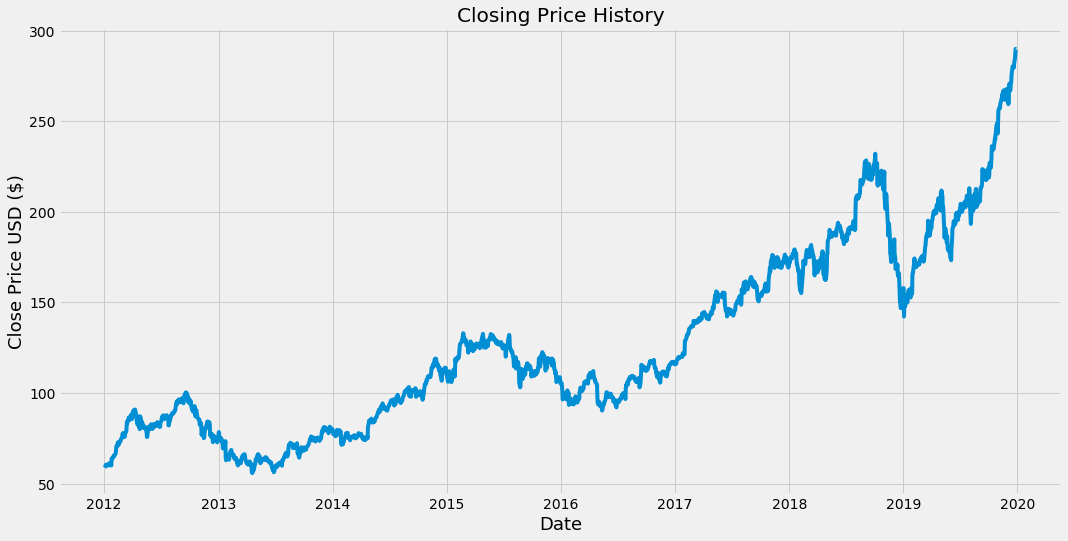

In [53]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [54]:
# Create new data frame witn only Close column
data = df.filter(['Close'])
# Convert the data frame to a numpy array
dataset = data.values
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

1608

In [55]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01263088],
       [0.0139794 ],
       [0.01678015],
       ...,
       [0.97590973],
       [1.        ],
       [0.99953009]])

In [56]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01263088, 0.0139794 , 0.01678015, 0.01944668, 0.01903785,
       0.01995923, 0.0195382 , 0.01883038, 0.0178663 , 0.02085011,
       0.02354104, 0.02271118, 0.01816529, 0.02250372, 0.0182324 ,
       0.03424983, 0.03301114, 0.03462815, 0.03812452, 0.04024186,
       0.04006491, 0.03941202, 0.04219447, 0.04481217, 0.0477777 ,
       0.05256767, 0.06262966, 0.06278221, 0.06838374, 0.07256961,
       0.06537549, 0.06814576, 0.06809085, 0.07585854, 0.07475409,
       0.0767982 , 0.08047154, 0.08251569, 0.088404  , 0.09269362,
       0.09393228, 0.09436553, 0.08703108, 0.08526151, 0.08552391,
       0.09241901, 0.09435943, 0.09852699, 0.10835102, 0.12145786,
       0.1190049 , 0.11901099, 0.12848722, 0.13145272, 0.12934147,
       0.1274133 , 0.12540578, 0.13207511, 0.13665154, 0.13856752])]
[0.13383245710331262]

[array([0.01263088, 0.0139794 , 0.01678015, 0.01944668, 0.01903785,
       0.01995923, 0.0195382 , 0.01883038, 0.0178663 , 0.02085011,
       0.02354104, 0.02271118, 0.01

In [0]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [81]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1548, 60, 1)

In [0]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [85]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1548/1548 [==============================] - 121s 78ms/step - loss: 7.4821e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
# Get model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [99]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1.8721505919499184

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


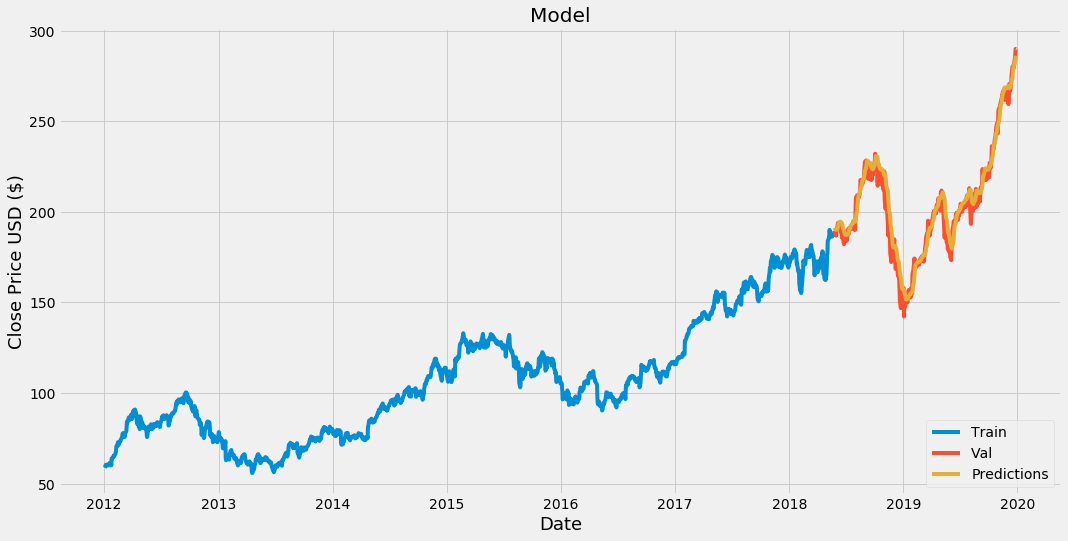

In [100]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [101]:
# Show the valid and predicted values
valid

,Close,Predictions
Date,,
2018-05-24,188.149994,189.854538
2018-05-25,188.580002,189.994781
2018-05-29,187.899994,190.185059
2018-05-30,187.500000,190.290421
2018-05-31,186.869995,190.296799
...,...,...
2019-12-20,279.440002,280.722504
2019-12-23,284.000000,281.739410
2019-12-24,284.269989,283.036987


In [104]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-27')
# Create new dataframe 
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing value and convert the dataframe into an array
last_60_days = new_df[-60:].values
# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
# Append the past 60 days to the list
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[287.8713]]


In [105]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-28', end='2019-12-28')
print(apple_quote2['Close'])

Date
2019-12-27    289.799988
Name: Close, dtype: float64
